# Analyzing Urban Homicide Data

In [79]:
import pandas as pd # type: ignore 
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns

In [80]:
path="data/homicide-data.csv"
df = pd.read_csv(path, encoding="latin-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            52179 non-null  object 
 1   reported_date  52179 non-null  int64  
 2   victim_last    52178 non-null  object 
 3   victim_first   52179 non-null  object 
 4   victim_race    52179 non-null  object 
 5   victim_age     52179 non-null  object 
 6   victim_sex     52179 non-null  object 
 7   city           52179 non-null  object 
 8   state          52179 non-null  object 
 9   lat            52119 non-null  float64
 10  lon            52119 non-null  float64
 11  disposition    52179 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


In [81]:
# replacing the abbrevated values in the 'state' column and converting it to category dtype
dict_1 = {'NM': 'New Mexico','GA': 'Georgia','MD': 'Maryland','LA': 'Louisiana',
'AL': 'Alabama','MA': 'Massachusetts','NY': 'New York','NC': 'North Carolina','IL': 'Illinois',
'OH': 'Ohio','TX': 'Texas','CO': 'Colorado','MI': 'Michigan','CA': 'California','IN': 'Indiana','FL': 'Florida',
'MO': 'Missouri','NV': 'Nevada','KY': 'Kentucky','TN': 'Tennessee','wI': 'Wisconsin','MN': 'Minnesota','OK': 'Oklahoma',
'NE': 'Nebraska','PA': 'Pennsylvania','AZ': 'Arizona','VA': 'Virginia','DC': 'District of Columbia',}
df['state'] = df['state'].replace(dict_1)
df['state'] = df['state'].astype('category')

# replacing the values in these two rows to values that are convertible to datetime
value_1 = df.iloc[33584, df.columns.get_loc('reported_date')]
print(value_1)
new_value1 = 20151118
df.iloc[33584, df.columns.get_loc('reported_date')]= new_value1

value_2 = df.iloc[33587, df.columns.get_loc('reported_date')]
print(value_2)
new_value2 = 20151105
df.iloc[33587, df.columns.get_loc('reported_date')] = new_value2

# converting the 'reported_date' column to dtype format
df['reported_date'] = pd.to_datetime(df['reported_date'], format='%Y%m%d')

# Extracting year,month and day into sparate columns
df['reported_year'] = df['reported_date'].dt.year
df['reported_month'] = df['reported_date'].dt.month
df['reported_day'] = df['reported_date'].dt.day

df= df.rename(columns={'uid':'Unique_ID'})

201511018
201511105


In [82]:
# Dropping 'Unknown' values from these two columns. This will enable us to convert them to their appropriate dtype
df = df[(df['victim_age'] != 'Unknown') & (df['victim_sex'] != 'Unknown')]

In [83]:
# changing the dtype of these columns
df['victim_age'] = df['victim_age'].astype('int32')
df['victim_race'] = df['victim_race'].astype('category')
df['city'] = df['city'].astype('category')
df['state'] = df['state'].astype('category')
df['victim_sex'] = df['victim_sex'].astype('category')

In [84]:
# dropping duplicated values from the dataframe, if there are any
df = df.drop_duplicates(subset=None,keep='first', ignore_index=False)

## Distribution of Victim Ages

C:\Users\alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


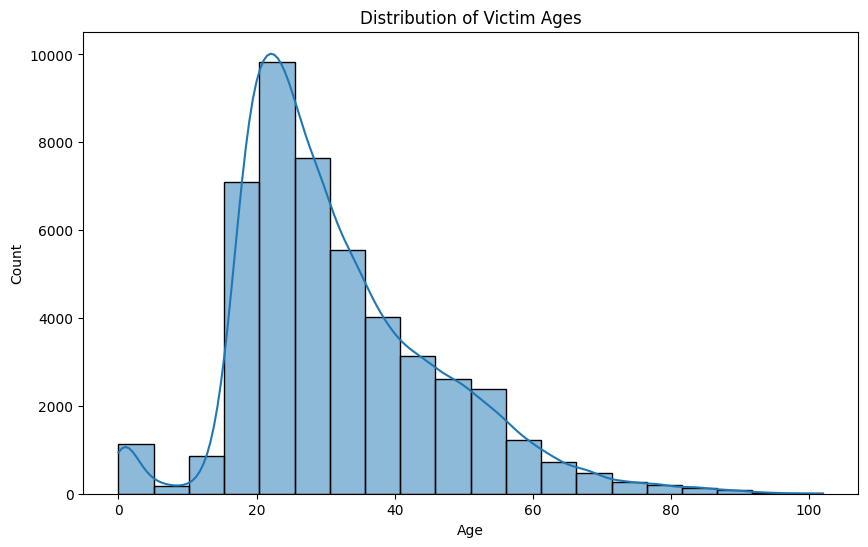

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='victim_age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Victim Ages')
plt.show()

## Homicides Over Time (years)

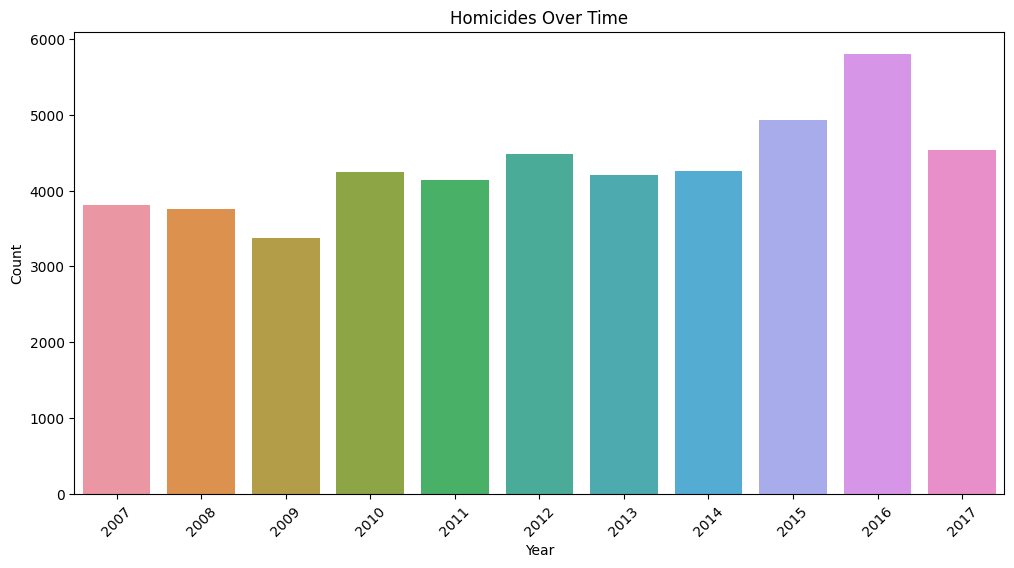

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='reported_year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Homicides Over Time')
plt.xticks(rotation=45)
plt.show()

In [87]:
dict_3 = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['reported_month'] = df['reported_month'].replace(dict_3)

##  Homicides Over Time (month)

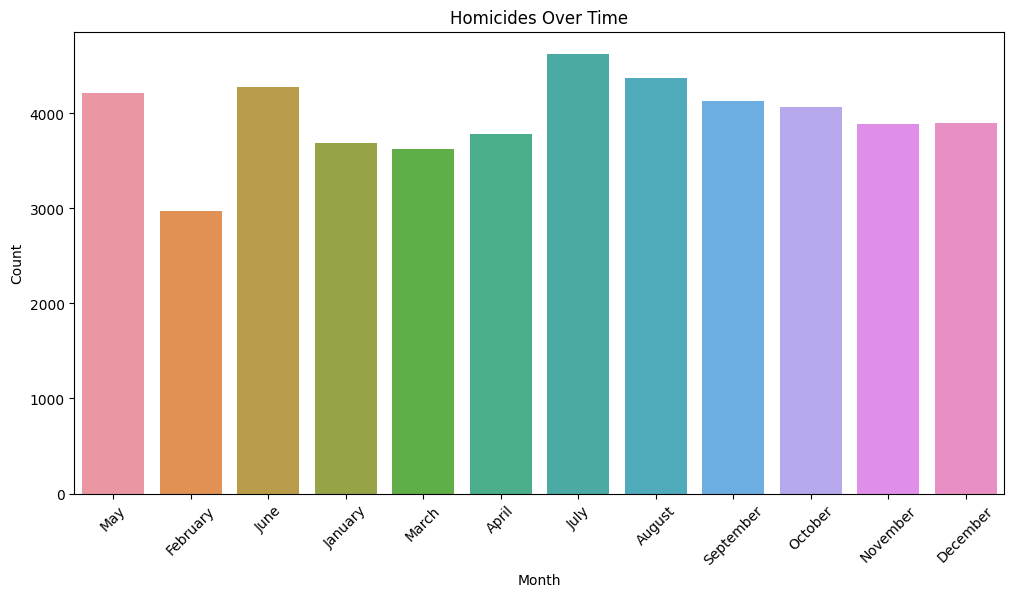

In [88]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='reported_month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Homicides Over Time')
plt.xticks(rotation=45)
plt.show()

In [89]:
df = (df[df['victim_race'] != 'Unknown'])

In [90]:
df['victim_race']

0        Hispanic
1        Hispanic
2           White
3        Hispanic
4           White
           ...   
52174       Black
52175       Black
52176       Black
52177       Black
52178       Black
Name: victim_race, Length: 47536, dtype: category
Categories (6, object): ['Asian', 'Black', 'Hispanic', 'Other', 'Unknown', 'White']

## Distribution of homicide by Race

C:\Users\alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


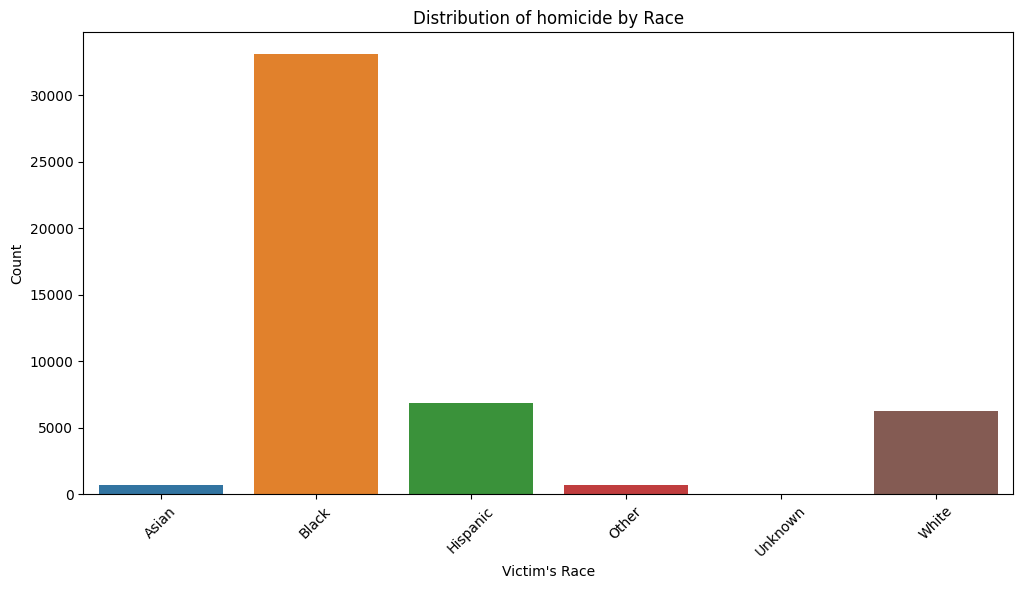

In [91]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='victim_race')
plt.xlabel("Victim's Race")
plt.ylabel('Count')
plt.title('Distribution of homicide by Race')
plt.xticks(rotation=45)
plt.show()

## Distribution of Victim Sex

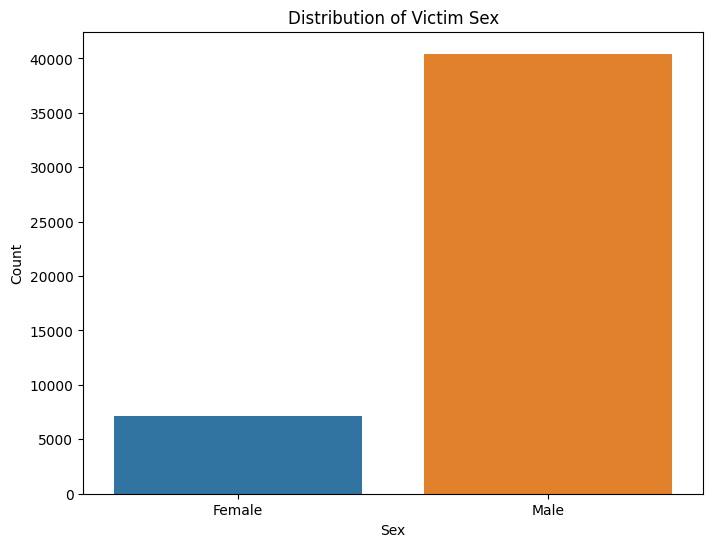

In [92]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='victim_sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Victim Sex')
plt.show()

## Distribution of Victim disposition

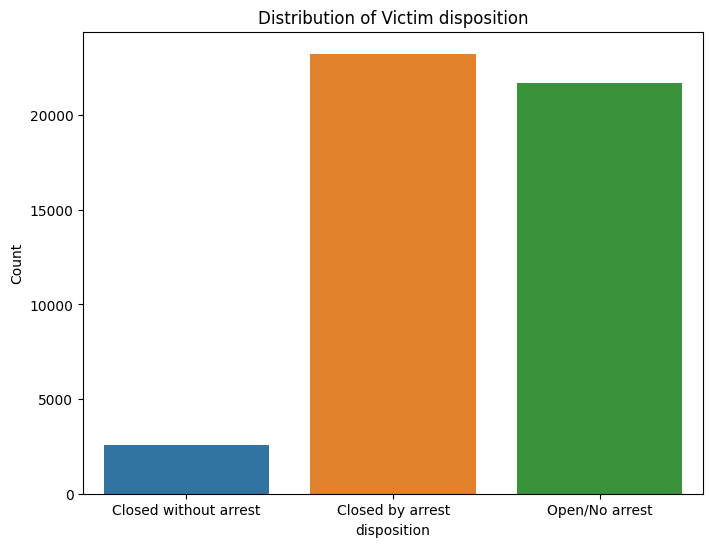

In [93]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='disposition')
plt.xlabel('disposition')
plt.ylabel('Count')
plt.title('Distribution of Victim disposition')
plt.show()

## Top 10 Cities with the Most Homicides

C:\Users\alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


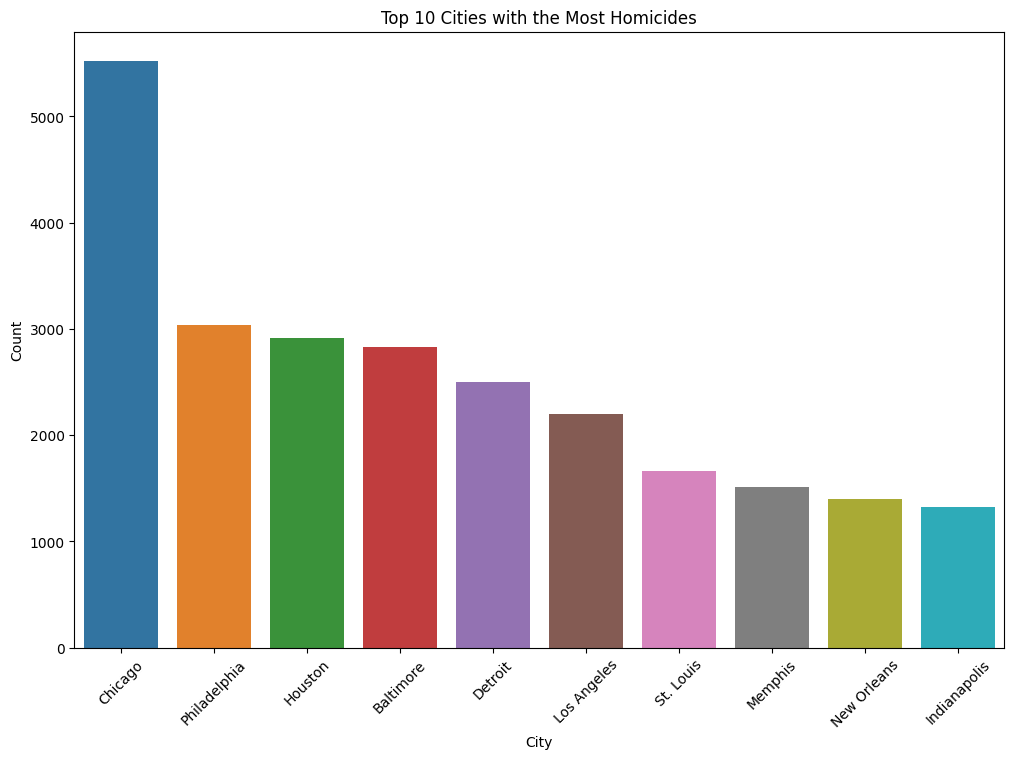

In [94]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index[:10])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities with the Most Homicides')
plt.xticks(rotation=45)
plt.show()

In [95]:
df.head()

,Unique_ID,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,reported_year,reported_month,reported_day
0,Alb-000001,2010-05-04,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,New Mexico,35.095788,-106.538555,Closed without arrest,2010,May,4
1,Alb-000002,2010-02-16,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,New Mexico,35.056810,-106.715321,Closed by arrest,2010,February,16
2,Alb-000003,2010-06-01,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,New Mexico,35.086092,-106.695568,Closed without arrest,2010,June,1
3,Alb-000004,2010-01-01,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,New Mexico,35.078493,-106.556094,Closed by arrest,2010,January,1
4,Alb-000005,2010-01-02,MULA,VIVIAN,White,72,Female,Albuquerque,New Mexico,35.130357,-106.580986,Closed without arrest,2010,January,2
